In [1]:
# 화면 가로 확장 코드 (기본 width 50%)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

### 데이터 판다스로 입력, 컬럼 정리

In [2]:
import pandas as pd
ch1 = pd.read_csv('../../../channel_1.dat', names=['Unix', 'Watt'],header=None, delimiter=" ")
print('Data File Import Done.')

Data File Import Done.


In [3]:
ch1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21837636 entries, 0 to 21837635
Data columns (total 2 columns):
 #   Column  Dtype
---  ------  -----
 0   Unix    int64
 1   Watt    int64
dtypes: int64(2)
memory usage: 333.2 MB


In [4]:
from datetime import datetime
ch1_dated = pd.DataFrame(ch1,columns = ['Unix', 'Date', 'Watt'])

ch1_dated['Date'] = pd.to_datetime(ch1['Unix'], unit='s')
ch1_dated.info()
ch1_dated.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21837636 entries, 0 to 21837635
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Unix    int64         
 1   Date    datetime64[ns]
 2   Watt    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 499.8 MB


,Unix,Date,Watt
0,1352500095,2012-11-09 22:28:15,599
1,1352500101,2012-11-09 22:28:21,582
2,1352500107,2012-11-09 22:28:27,600
3,1352500113,2012-11-09 22:28:33,586
4,1352500120,2012-11-09 22:28:40,596
5,1352500132,2012-11-09 22:28:52,581
6,1352500138,2012-11-09 22:28:58,597
7,1352500144,2012-11-09 22:29:04,592
8,1352500150,2012-11-09 22:29:10,587
9,1352500156,2012-11-09 22:29:16,574


### 변수 및 구분 단계

### csv 파일 저장을 위한 폴더 생성

In [5]:
import os
try:
    os.mkdir('./New_Electirc_Data_CSV')
except FileExistsError:
    print('해당 폴더가 이미 존재합니다.\n폴더를 확인해주세요.')

해당 폴더가 이미 존재합니다.
폴더를 확인해주세요.


### 실험안

In [ ]:
import csv
import time
import sys
month = {1:31, 2:28, 3:31, 4:30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30, 12:31}

EMPTY_HOUR_LIST=[]
for _ in range(60):
    EMPTY_HOUR_LIST.append(0)
    
EMPTY_DAY_LIST=[]
for _ in range(1440):
    EMPTY_DAY_LIST.append(0)
#===============================================================================================================
def value (data, num):
    list0 = data.loc[num].values.tolist()
    date = list0[1]
    YYYY = date.year
    MM = date.month
    DD = date.day
    hh = date.hour
    mm = date.minute
    watt = list0[2]
    return YYYY, MM, DD, hh, mm, watt, date
#===============================================================================================================
print("해당 전력 데이터는 2012년 11월 10일부터 2017년 4월 25일까지 온전한 데이터가 존재합니다.\n")
time.sleep(0.5)
print("데이터는 사용자가 선택한 기간 중 1년 단위로 처리됩니다.\n")
time.sleep(0.5)
global TARGET_YEAR_START 
TARGET_YEAR_START = int(input("목표로 하는 처리 기간의 시작 연도를 4자리 숫자로 입력해주세요. : \n"))
time.sleep(0.5)
global TARGET_YEAR_END
TARGET_YEAR_END = int(input("목표로 하는 처리 기간의 종료 연도를 4자리 숫자로 입력해주세요. : \n"))
time.sleep(0.5)

if(TARGET_YEAR_START<2012 or TARGET_YEAR_START>2017 or TARGET_YEAR_END>2017 or  TARGET_YEAR_END<2012):
    print("\---기간을 잘못 설정했습니다!---")
    print("---프로그램을 종료합니다.---")
    sys.exit()

if(TARGET_YEAR_START==2012 or TARGET_YEAR_END==2017):
    print("\n---해당 기간은 현재 서비스하지 않습니다!---")
    print("---프로그램을 종료합니다.---")
    sys.exit()

global HANDLE_MINUTE
HANDLE_MINUTE = int(input("데이터들은 기본적으로 1분 단위 최댓값으로 정리됩니다.\n추후 가공될 분 단위를 5분과 10분 중 골라 숫자만 입력해주세요. : \n"))
if(HANDLE_MINUTE!=5 and HANDLE_MINUTE!=10):
    print("\n---잘못된 시간 처리 단위를 선택했습니다!---")
    print("---프로그램을 종료합니다.---")
    sys.exit()

#TARGET_YEAR_START = 2013
#TARGET_YEAR_END=2013
#===============================================================================================================

i1=0
if TARGET_YEAR_START==2013:
    i1=431369
if TARGET_YEAR_START==2014:
    i1=5133231
    
#i1=431369
#i1=5133230

while(i1 < len(ch1_dated)):
    print("전체 과정 시작")
    YEAR0 = value(ch1_dated, i1)[0]

    if(YEAR0>=TARGET_YEAR_START and YEAR0<=TARGET_YEAR_END):
        print("<<<<<{0}년 데이터 시작 {1}>>>>>".format(YEAR0, value(ch1_dated, i1)[6]))
        MONTH0 = value(ch1_dated, i1)[1]
        
        REAL_DAY = 1
        ONE_MONTH_LIST=[]
        while(MONTH0<13):
            print("<<<<{0}월 데이터 시작 {1}>>>>".format(MONTH0, value(ch1_dated, i1)[6]), i1)
            MONTH1 = value(ch1_dated, i1)[1]
            DAY1= value(ch1_dated, i1)[2]
            
            if DAY1==REAL_DAY:
                while(REAL_DAY<=month[MONTH1]):
                    print("<<<{0}일 데이터 시작 {1}>>>".format(REAL_DAY, value(ch1_dated, i1)[6]), i1)
        
                    REAL_HOUR = 0
                    ONE_DAY_LIST=[]
                    while(REAL_HOUR<24):
                        print("<<{0}시 데이터 시작 {1}>>".format(REAL_HOUR, value(ch1_dated, i1)[6]), i1)
                        HOUR1 = value(ch1_dated, i1)[3]

                        REAL_MINUTE = 0
                        MIN_60_LIST=[]
                        if HOUR1==REAL_HOUR:
                            while(REAL_MINUTE<60):#특정 시간대 안에서 분단위 데이터를 60개 처리
                                MINUTE1 = value(ch1_dated, i1)[4]
                                HOUR2 = value(ch1_dated, i1)[3]

                                #print("<{0}분 데이터 시작 {1}>".format(REAL_MINUTE, value(ch1_dated, i1)[6]),i1)
                                SEC_60_LIST=[]

                                if MINUTE1==REAL_MINUTE and HOUR2==REAL_HOUR:
                                    while(True):#특정 분대 안에서 초단위 데이터를 처리
                                        MONTH2 = value(ch1_dated, i1)[1]
                                        DAY1 = value(ch1_dated, i1)[2] #여기 넣는게 맞나......??
                                        HOUR3 = value(ch1_dated, i1)[3]
                                        MINUTE2 = value(ch1_dated, i1)[4]
                                        SEC_60_LIST.append(value(ch1_dated, i1)[5])
                                        i1+=1

                                        if MINUTE1!=MINUTE2:
                                            if MINUTE2-MINUTE1==1 or MINUTE1-MINUTE2==59: #직후 분으로 넘어가거나 59분에서 다음 시로 넘어가는 경우
                                                #print("*{0}분의 값들 >> {1}\n".format(MINUTE1, SEC_60_LIST))
                                                i1-=1
                                                break

                                            else:#진행되다가 분대가 넘어가긴 했으나 다음 분으로 넘어가지 않고 점프해버린경우
                                                #print("*{0}분의 값들 >> {1} (결손 후 점프 시각 => {2})\n".format(MINUTE1, SEC_60_LIST, value(ch1_dated, i1)[6]))
                                                break

                                if MINUTE1!=REAL_MINUTE:#아예 해당분대가 결손된 경우
                                    if HOUR3==REAL_HOUR:
                                        #print("같은 시각대 내 분 결손")
                                        SEC_60_LIST.append(0)
                                        #print("*{0}시 {1}분의 결손치는 0으로 처리됨.\n".format(REAL_HOUR, REAL_MINUTE))
                                        
                                    if HOUR3!=REAL_HOUR:
                                        #print("결손 + 타 시각대 점프")
                                        for _ in range(60-len(MIN_60_LIST)):
                                            MIN_60_LIST.append(0)
                                            #print("*{0}시 {1}분의 결손치는 0으로 처리됨.\n".format(REAL_HOUR, REAL_MINUTE))
                                            REAL_MINUTE+=1
                                        break
                                
                                MIN_60_LIST.append(max(SEC_60_LIST))
                                REAL_MINUTE+=1

                        # 어떤 경우든 간에 시간이 바뀌는 경우, 정상이든 결손이든
                        if HOUR1!=REAL_HOUR:                
                            if DAY1==REAL_DAY:
                                #print("시각 불일치! 점프됨!")
                                for i in EMPTY_HOUR_LIST:
                                    ONE_DAY_LIST.append(i)
                                #print("*{0}시의 결손 데이터는 60개의 0으로 처리됨.{1}".format(REAL_HOUR, "\n"*3))
                                
                            if DAY1!=REAL_DAY:
                                #print("시각 불일치! 점프됨!")
                                if REAL_HOUR==0:
                                    break

                                FAKE_HOUR=REAL_HOUR
                                for _ in range(23-REAL_HOUR+1):
                                    for i in EMPTY_HOUR_LIST:
                                        ONE_DAY_LIST.append(i)
                                    #print("*{0}시의 결손 데이터는 60개의 0으로 처리됨.{1}".format(FAKE_HOUR, "\n"*3))
                                    FAKE_HOUR+=1
                                REAL_HOUR=23
                                

                        if REAL_MINUTE==60:
                            if len(MIN_60_LIST)==60:
                                for i in MIN_60_LIST:
                                    ONE_DAY_LIST.append(i)
                                
                            if len(MIN_60_LIST)<60:
                                for i in range(60-len(MIN_60_LIST)):
                                    MIN_60_LIST.append(0)
                                for i in MIN_60_LIST:
                                    ONE_DAY_LIST.append(i)
                                    
                            #print("*{0}시의 분별 최댓값 {1}개 >> {2}{3}".format(REAL_HOUR, len(MIN_60_LIST), MIN_60_LIST, "\n"*3))
                            
                        REAL_HOUR+=1

                    if REAL_HOUR==24:
                        if len(ONE_DAY_LIST)==1440:
                            for i in ONE_DAY_LIST:
                                    ONE_MONTH_LIST.append(i)
                        if len(ONE_DAY_LIST)<1440:
                            for _ in range(1440-len(ONE_DAY_LIST)):
                                ONE_DAY_LIST.append(0)
                            for i in ONE_DAY_LIST:
                                ONE_MONTH_LIST.append(i)
                        
                        print("*{0}일의 분별 최댓값 {1}개 추가됨.".format(REAL_DAY, len(ONE_DAY_LIST)))
                        print("{0}개의 데이터 누적, 계산된 일자 => {1}{2}".format(len(ONE_MONTH_LIST), len(ONE_MONTH_LIST)//1440, "\n"*5))
                            
                    if DAY1!=REAL_DAY and REAL_HOUR!=24:
                        break
                    
                    REAL_DAY+=1
                    #print("Real Day 1 더해짐! 현재 정상일 => {0}{1}".format(REAL_DAY, "\n"*5))
                    
            if DAY1!=REAL_DAY:
                if MONTH2==MONTH1:
                    #for _ in range(DAY1-REAL_DAY-1):
                    for _ in range(1440-len(ONE_DAY_LIST)):
                        ONE_DAY_LIST.append(0)
                    for i in ONE_DAY_LIST:
                        ONE_MONTH_LIST.append(i)
                            
                    print("*{0}일의 분별 최댓값 {1}개 결손 처리됨(1)".format(REAL_DAY, len(ONE_DAY_LIST)))
                    print("{0}개의 데이터 누적, 계산된 일자 => {1}{2}".format(len(ONE_MONTH_LIST), len(ONE_MONTH_LIST)//1440, "\n"*5))
                    REAL_DAY+=1
                    
                if MONTH2!=MONTH1:
                    while(REAL_DAY<=month[MONTH1]):
                        #print("일자 불일치! 점프됨!")
                        #print(REAL_DAY, month[MONTH1])
                        if REAL_HOUR==0:
                            ONE_DAY_LIST=EMPTY_DAY_LIST
                            for i in EMPTY_DAY_LIST:
                                ONE_MONTH_LIST.append(i)

                        if REAL_HOUR!=0:
                            for _ in range(1440-len(ONE_DAY_LIST)):
                                ONE_DAY_LIST.append(0)
                            for i in ONE_DAY_LIST:
                                ONE_MONTH_LIST.append(i)
                                
                        print("*{0}일의 분별 최댓값 {1}개 결손 처리됨(2)".format(REAL_DAY, len(ONE_DAY_LIST)))
                        print("{0}개의 데이터 누적, 계산된 일자 => {1}{2}".format(len(ONE_MONTH_LIST), len(ONE_MONTH_LIST)//1440, "\n"*5))       
                        REAL_DAY+=1
                        
                    if REAL_DAY==month[MONTH1]+1:
                        break
                
        num=0
        try:
            for D in range(1, month[1]+1):
                if int(D)<10:
                    D=str(0)+str(D)
                for H in range(24):
                    if int(H)<10:
                        H=str(0)+str(H)
                    for M in range(60):
                        if int(M)<10:
                            M=str(0)+str(M)
                        SAVE_LIST=[]
                        SAVE_LIST.append(str(D))
                        SAVE_LIST.append(str(H))
                        SAVE_LIST.append(str(M))
                        SAVE_LIST.append(ONE_MONTH_LIST[num])

                        with open("./New_Electirc_Data_CSV/"+str(YEAR0)+'_'+str(MONTH0)+'_'+"House1_Ch1_Electric_Data_NEW.csv", 'a', newline='') as file:
                            writer = csv.writer(file)
                            writer.writerow(SAVE_LIST)
                        int(M)
                        num+=1

        except:
            pass
                    
        print("{0}월의 {1}일분 전체 데이터 {2}개 CSV 파일 저장 완료{3}".format(MONTH1, len(ONE_MONTH_LIST)//1440, len(ONE_MONTH_LIST), "\n"*10))
        print(i1)
        
        if value(ch1_dated, i1+1)[0]!=value(ch1_dated, i1)[0]:
            i1+=1
        
    else:
        if value(ch1_dated, i1)[0]<TARGET_YEAR_START:
            i1+=1
        if value(ch1_dated, i1)[0]>TARGET_YEAR_END:
            sys.exit()

해당 전력 데이터는 2012년 11월 10일부터 2017년 4월 25일까지 온전한 데이터가 존재합니다.

데이터는 사용자가 선택한 기간 중 1년 단위로 처리됩니다.

목표로 하는 처리 기간의 시작 연도를 4자리 숫자로 입력해주세요. : 
2013
목표로 하는 처리 기간의 종료 연도를 4자리 숫자로 입력해주세요. : 
2016
데이터들은 기본적으로 1분 단위 최댓값으로 정리됩니다.
추후 가공될 분 단위를 5분과 10분 중 골라 숫자만 입력해주세요. : 
5
전체 과정 시작
<<<<<2013년 데이터 시작 2013-01-01 00:00:07>>>>>
<<<<1월 데이터 시작 2013-01-01 00:00:07>>>> 431369
<<<1일 데이터 시작 2013-01-01 00:00:07>>> 431369
<<0시 데이터 시작 2013-01-01 00:00:07>> 431369
<<1시 데이터 시작 2013-01-01 01:00:05>> 431925
<<2시 데이터 시작 2013-01-01 02:00:04>> 432490
<<3시 데이터 시작 2013-01-01 03:00:05>> 433054
<<4시 데이터 시작 2013-01-01 04:00:03>> 433619
<<5시 데이터 시작 2013-01-01 05:00:02>> 434179
<<6시 데이터 시작 2013-01-01 06:00:04>> 434740
<<7시 데이터 시작 2013-01-01 07:00:05>> 435305
<<8시 데이터 시작 2013-01-01 08:00:04>> 435875
<<9시 데이터 시작 2013-01-01 09:00:03>> 436431
<<10시 데이터 시작 2013-01-01 10:00:01>> 436983
<<11시 데이터 시작 2013-01-01 11:00:00>> 437528
<<12시 데이터 시작 2013-01-01 12:00:00>> 438089
<<13시 데이터 시작 2013-01-01 13:00:01>> 438657
<<14시 데이터 시작 2013-01-01 1

<<3시 데이터 시작 2013-01-08 03:00:03>> 524806
<<4시 데이터 시작 2013-01-08 04:00:01>> 525351
<<5시 데이터 시작 2013-01-08 05:00:00>> 525918
<<6시 데이터 시작 2013-01-08 06:00:00>> 526477
<<7시 데이터 시작 2013-01-08 07:00:02>> 527020
<<8시 데이터 시작 2013-01-08 08:00:04>> 527558
<<9시 데이터 시작 2013-01-08 09:00:03>> 528128
<<10시 데이터 시작 2013-01-08 10:00:05>> 528691
<<11시 데이터 시작 2013-01-08 11:00:01>> 529255
<<12시 데이터 시작 2013-01-08 12:00:02>> 529818
<<13시 데이터 시작 2013-01-08 13:00:03>> 530378
<<14시 데이터 시작 2013-01-08 14:00:02>> 530937
<<15시 데이터 시작 2013-01-08 15:00:00>> 531490
<<16시 데이터 시작 2013-01-08 16:00:00>> 532050
<<17시 데이터 시작 2013-01-08 17:00:01>> 532620
<<18시 데이터 시작 2013-01-08 18:00:01>> 533163
<<19시 데이터 시작 2013-01-08 19:00:05>> 533709
<<20시 데이터 시작 2013-01-08 20:00:01>> 534277
<<21시 데이터 시작 2013-01-08 21:00:05>> 534839
<<22시 데이터 시작 2013-01-08 22:00:03>> 535407
<<23시 데이터 시작 2013-01-08 23:00:03>> 535972
*8일의 분별 최댓값 1440개 추가됨.
11520개의 데이터 누적, 계산된 일자 => 8





<<<9일 데이터 시작 2013-01-09 00:00:04>>> 536526
<<0시 데이터 시작 2013-01-09 00:

<<9시 데이터 시작 2013-01-21 09:00:05>> 599537
<<10시 데이터 시작 2013-01-21 10:03:14>> 600059
<<11시 데이터 시작 2013-01-21 11:00:03>> 600515
<<12시 데이터 시작 2013-01-21 12:00:04>> 601054
<<13시 데이터 시작 2013-01-21 13:00:35>> 601540
<<14시 데이터 시작 2013-01-21 14:00:05>> 602052
<<15시 데이터 시작 2013-01-21 18:01:32>> 602132
<<16시 데이터 시작 2013-01-21 18:01:32>> 602132
<<17시 데이터 시작 2013-01-21 18:01:32>> 602132
<<18시 데이터 시작 2013-01-21 18:01:32>> 602132
<<19시 데이터 시작 2013-01-21 19:00:05>> 602670
<<20시 데이터 시작 2013-01-21 20:00:00>> 603213
<<21시 데이터 시작 2013-01-21 21:00:05>> 603762
<<22시 데이터 시작 2013-01-21 22:00:03>> 604326
<<23시 데이터 시작 2013-01-21 23:00:00>> 604882
*21일의 분별 최댓값 1440개 추가됨.
30240개의 데이터 누적, 계산된 일자 => 21





<<<22일 데이터 시작 2013-01-22 00:00:00>>> 605433
<<0시 데이터 시작 2013-01-22 00:00:00>> 605433
<<1시 데이터 시작 2013-01-22 01:00:04>> 605987
<<2시 데이터 시작 2013-01-22 02:00:05>> 606539
<<3시 데이터 시작 2013-01-22 03:00:00>> 607099
<<4시 데이터 시작 2013-01-22 04:00:03>> 607652
<<5시 데이터 시작 2013-01-22 05:00:09>> 608203
<<6시 데이터 시작 2013-01-22 

<<19시 데이터 시작 2013-02-08 19:00:08>> 685331
<<20시 데이터 시작 2013-02-08 20:00:03>> 685876
<<21시 데이터 시작 2013-02-08 21:00:02>> 686417
<<22시 데이터 시작 2013-02-08 22:00:01>> 686969
<<23시 데이터 시작 2013-02-08 23:00:03>> 687515
*8일의 분별 최댓값 1440개 추가됨.
11520개의 데이터 누적, 계산된 일자 => 8





<<<9일 데이터 시작 2013-02-09 00:00:06>>> 688074
<<0시 데이터 시작 2013-02-09 00:00:06>> 688074
<<1시 데이터 시작 2013-02-09 01:00:04>> 688626
<<2시 데이터 시작 2013-02-09 02:00:17>> 689185
<<3시 데이터 시작 2013-02-09 03:00:02>> 689745
<<4시 데이터 시작 2013-02-09 04:00:03>> 690299
<<5시 데이터 시작 2013-02-09 05:00:04>> 690858
<<6시 데이터 시작 2013-02-09 06:00:02>> 691409
<<7시 데이터 시작 2013-02-09 07:00:08>> 691962
<<8시 데이터 시작 2013-02-09 08:00:04>> 692496
<<9시 데이터 시작 2013-02-09 09:00:51>> 692543
<<10시 데이터 시작 2013-02-09 10:00:00>> 693027
<<11시 데이터 시작 2013-02-09 11:00:03>> 693575
<<12시 데이터 시작 2013-02-09 12:00:00>> 694064
<<13시 데이터 시작 2013-02-09 13:00:00>> 694598
<<14시 데이터 시작 2013-02-09 14:00:04>> 695156
<<15시 데이터 시작 2013-02-09 15:00:05>> 695720
<<16시 데이터 시작 2013-02-09 16:00

<<4시 데이터 시작 2013-02-17 04:00:03>> 759295
<<5시 데이터 시작 2013-02-17 05:00:03>> 759853
<<6시 데이터 시작 2013-02-17 06:00:00>> 760414
<<7시 데이터 시작 2013-02-17 07:00:04>> 760976
<<8시 데이터 시작 2013-02-17 08:00:10>> 761532
<<9시 데이터 시작 2013-02-17 09:00:11>> 762081
<<10시 데이터 시작 2013-02-17 10:00:01>> 762631
<<11시 데이터 시작 2013-02-17 11:00:04>> 763180
<<12시 데이터 시작 2013-02-17 12:00:02>> 763741
<<13시 데이터 시작 2013-02-17 13:00:02>> 764305
<<14시 데이터 시작 2013-02-17 14:00:01>> 764861
<<15시 데이터 시작 2013-02-17 15:00:00>> 765427
<<16시 데이터 시작 2013-02-17 16:00:05>> 765999
<<17시 데이터 시작 2013-02-17 17:00:00>> 766562
<<18시 데이터 시작 2013-02-17 18:00:03>> 767116
<<19시 데이터 시작 2013-02-17 19:00:25>> 767667
<<20시 데이터 시작 2013-02-17 20:00:05>> 768215
<<21시 데이터 시작 2013-02-17 21:00:03>> 768781
<<22시 데이터 시작 2013-02-17 22:00:03>> 769338
<<23시 데이터 시작 2013-02-17 23:00:05>> 769897
*17일의 분별 최댓값 1440개 추가됨.
24480개의 데이터 누적, 계산된 일자 => 17





<<<18일 데이터 시작 2013-02-18 00:00:04>>> 770457
<<0시 데이터 시작 2013-02-18 00:00:04>> 770457
<<1시 데이터 시작 2013-02-18 

<<16시 데이터 시작 2013-02-24 16:00:05>> 856882
<<17시 데이터 시작 2013-02-24 17:00:00>> 857446
<<18시 데이터 시작 2013-02-24 18:00:10>> 857986
<<19시 데이터 시작 2013-02-24 19:00:01>> 858540
<<20시 데이터 시작 2013-02-24 20:00:05>> 859095
<<21시 데이터 시작 2013-02-24 21:00:05>> 859657
<<22시 데이터 시작 2013-02-24 22:00:02>> 860205
<<23시 데이터 시작 2013-02-24 23:00:03>> 860768
*24일의 분별 최댓값 1440개 추가됨.
34560개의 데이터 누적, 계산된 일자 => 24





<<<25일 데이터 시작 2013-02-25 00:00:05>>> 861321
<<0시 데이터 시작 2013-02-25 00:00:05>> 861321
<<1시 데이터 시작 2013-02-25 01:00:02>> 861878
<<2시 데이터 시작 2013-02-25 02:00:01>> 862431
<<3시 데이터 시작 2013-02-25 03:00:01>> 862990
<<4시 데이터 시작 2013-02-25 04:00:03>> 863542
<<5시 데이터 시작 2013-02-25 05:00:01>> 864088
<<6시 데이터 시작 2013-02-25 06:00:00>> 864647
<<7시 데이터 시작 2013-02-25 07:00:00>> 865203
<<8시 데이터 시작 2013-02-25 08:00:03>> 865752
<<9시 데이터 시작 2013-02-25 09:00:04>> 866302
<<10시 데이터 시작 2013-02-25 10:00:03>> 866855
<<11시 데이터 시작 2013-02-25 11:00:00>> 867393
<<12시 데이터 시작 2013-02-25 12:00:05>> 867737
<<13시 데이터 시작 2013-02-25 13

<<1시 데이터 시작 2013-03-04 01:00:09>> 954527
<<2시 데이터 시작 2013-03-04 02:00:01>> 955078
<<3시 데이터 시작 2013-03-04 03:00:01>> 955631
<<4시 데이터 시작 2013-03-04 04:00:03>> 956187
<<5시 데이터 시작 2013-03-04 05:00:06>> 956744
<<6시 데이터 시작 2013-03-04 06:00:05>> 957294
<<7시 데이터 시작 2013-03-04 07:00:05>> 957851
<<8시 데이터 시작 2013-03-04 08:00:02>> 958393
<<9시 데이터 시작 2013-03-04 09:00:06>> 958945
<<10시 데이터 시작 2013-03-04 10:00:03>> 959504
<<11시 데이터 시작 2013-03-04 11:00:05>> 960059
<<12시 데이터 시작 2013-03-04 12:00:04>> 960606
<<13시 데이터 시작 2013-03-04 13:00:05>> 961157
<<14시 데이터 시작 2013-03-04 14:00:05>> 961716
<<15시 데이터 시작 2013-03-04 15:00:03>> 962272
<<16시 데이터 시작 2013-03-04 16:00:00>> 962831
<<17시 데이터 시작 2013-03-04 17:00:07>> 963393
<<18시 데이터 시작 2013-03-04 18:00:00>> 963952
<<19시 데이터 시작 2013-03-04 19:00:00>> 964507
<<20시 데이터 시작 2013-03-04 20:00:01>> 965065
<<21시 데이터 시작 2013-03-04 21:00:05>> 965624
<<22시 데이터 시작 2013-03-04 22:00:01>> 966187
<<23시 데이터 시작 2013-03-04 23:00:03>> 966741
*4일의 분별 최댓값 1440개 추가됨.
5760개의 데이터 누적, 계산된 일

<<1시 데이터 시작 2013-03-12 01:00:00>> 1047326
<<2시 데이터 시작 2013-03-12 02:00:00>> 1047884
<<3시 데이터 시작 2013-03-12 03:00:03>> 1048439
<<4시 데이터 시작 2013-03-12 04:00:02>> 1049000
<<5시 데이터 시작 2013-03-12 05:00:04>> 1049558
<<6시 데이터 시작 2013-03-12 06:00:02>> 1050115
<<7시 데이터 시작 2013-03-12 07:00:01>> 1050665
<<8시 데이터 시작 2013-03-12 08:00:02>> 1051212
<<9시 데이터 시작 2013-03-12 09:00:05>> 1051759
<<10시 데이터 시작 2013-03-12 10:59:50>> 1051804
<<11시 데이터 시작 2013-03-12 11:00:02>> 1051806
<<12시 데이터 시작 2013-03-12 12:00:00>> 1051976
<<13시 데이터 시작 2013-03-12 13:00:02>> 1052556
<<14시 데이터 시작 2013-03-12 14:00:05>> 1053105
<<15시 데이터 시작 2013-03-12 15:00:05>> 1053681
<<16시 데이터 시작 2013-03-12 16:00:01>> 1054264
<<17시 데이터 시작 2013-03-12 17:00:02>> 1054853
<<18시 데이터 시작 2013-03-12 18:00:01>> 1055433
<<19시 데이터 시작 2013-03-12 19:00:03>> 1056021
<<20시 데이터 시작 2013-03-12 20:00:02>> 1056608
<<21시 데이터 시작 2013-03-12 21:00:01>> 1057195
<<22시 데이터 시작 2013-03-12 22:00:26>> 1057771
<<23시 데이터 시작 2013-03-12 23:00:04>> 1058356
*12일의 분별 최댓값 1440개 추

<<9시 데이터 시작 2013-03-19 09:00:05>> 1145761
<<10시 데이터 시작 2013-03-19 10:00:05>> 1146265
<<11시 데이터 시작 2013-03-19 11:00:03>> 1146817
<<12시 데이터 시작 2013-03-19 12:00:05>> 1147385
<<13시 데이터 시작 2013-03-19 13:00:01>> 1147963
<<14시 데이터 시작 2013-03-19 14:00:04>> 1148537
<<15시 데이터 시작 2013-03-19 15:00:02>> 1149112
<<16시 데이터 시작 2013-03-19 16:00:00>> 1149696
<<17시 데이터 시작 2013-03-19 17:00:05>> 1150266
<<18시 데이터 시작 2013-03-19 18:00:01>> 1150831
<<19시 데이터 시작 2013-03-19 19:00:00>> 1151382
<<20시 데이터 시작 2013-03-19 20:00:04>> 1151957
<<21시 데이터 시작 2013-03-19 21:00:01>> 1152535
<<22시 데이터 시작 2013-03-19 22:00:01>> 1153094
<<23시 데이터 시작 2013-03-19 23:00:02>> 1153669
*19일의 분별 최댓값 1440개 추가됨.
27360개의 데이터 누적, 계산된 일자 => 19





<<<20일 데이터 시작 2013-03-20 00:00:02>>> 1154246
<<0시 데이터 시작 2013-03-20 00:00:02>> 1154246
<<1시 데이터 시작 2013-03-20 01:00:00>> 1154823
<<2시 데이터 시작 2013-03-20 02:00:02>> 1155393
<<3시 데이터 시작 2013-03-20 03:00:04>> 1155966
<<4시 데이터 시작 2013-03-20 04:00:03>> 1156537
<<5시 데이터 시작 2013-03-20 05:00:02>> 1157108
<

<<17시 데이터 시작 2013-03-26 17:00:00>> 1244185
<<18시 데이터 시작 2013-03-26 18:00:00>> 1244756
<<19시 데이터 시작 2013-03-26 19:00:01>> 1245316
<<20시 데이터 시작 2013-03-26 20:00:04>> 1245891
<<21시 데이터 시작 2013-03-26 21:00:02>> 1246455
<<22시 데이터 시작 2013-03-26 22:00:04>> 1247032
<<23시 데이터 시작 2013-03-26 23:00:04>> 1247599
*26일의 분별 최댓값 1440개 추가됨.
37440개의 데이터 누적, 계산된 일자 => 26





<<<27일 데이터 시작 2013-03-27 00:00:06>>> 1248154
<<0시 데이터 시작 2013-03-27 00:00:06>> 1248154
<<1시 데이터 시작 2013-03-27 01:00:05>> 1248722
<<2시 데이터 시작 2013-03-27 02:00:03>> 1249300
<<3시 데이터 시작 2013-03-27 03:00:01>> 1249879
<<4시 데이터 시작 2013-03-27 04:00:00>> 1250466
<<5시 데이터 시작 2013-03-27 05:00:01>> 1251055
<<6시 데이터 시작 2013-03-27 06:00:02>> 1251645
<<7시 데이터 시작 2013-03-27 07:00:04>> 1252238
<<8시 데이터 시작 2013-03-27 08:00:04>> 1252832
<<9시 데이터 시작 2013-03-27 09:00:05>> 1253393
<<10시 데이터 시작 2013-03-27 10:00:05>> 1253967
<<11시 데이터 시작 2013-03-27 11:00:00>> 1254546
<<12시 데이터 시작 2013-03-27 12:00:00>> 1255122
<<13시 데이터 시작 2013-03-27 13:32:30>> 1255127
<<14

<<21시 데이터 시작 2013-04-02 21:00:05>> 1343828
<<22시 데이터 시작 2013-04-02 22:00:04>> 1344411
<<23시 데이터 시작 2013-04-02 23:00:01>> 1344991
*2일의 분별 최댓값 1440개 추가됨.
2880개의 데이터 누적, 계산된 일자 => 2





<<<3일 데이터 시작 2013-04-03 00:00:03>>> 1345578
<<0시 데이터 시작 2013-04-03 00:00:03>> 1345578
<<1시 데이터 시작 2013-04-03 01:00:01>> 1346166
<<2시 데이터 시작 2013-04-03 02:00:01>> 1346757
<<3시 데이터 시작 2013-04-03 03:00:04>> 1347349
<<4시 데이터 시작 2013-04-03 04:00:01>> 1347942
<<5시 데이터 시작 2013-04-03 05:00:00>> 1348537
<<6시 데이터 시작 2013-04-03 06:00:00>> 1349133
<<7시 데이터 시작 2013-04-03 07:00:03>> 1349728
<<8시 데이터 시작 2013-04-03 08:00:04>> 1350310
<<9시 데이터 시작 2013-04-03 09:00:02>> 1350902
<<10시 데이터 시작 2013-04-03 10:00:00>> 1351493
<<11시 데이터 시작 2013-04-03 11:00:01>> 1352057
<<12시 데이터 시작 2013-04-03 12:00:05>> 1352568
<<13시 데이터 시작 2013-04-03 13:00:01>> 1353140
<<14시 데이터 시작 2013-04-03 14:00:02>> 1353718
<<15시 데이터 시작 2013-04-03 15:00:05>> 1354295
<<16시 데이터 시작 2013-04-03 16:00:05>> 1354874
<<17시 데이터 시작 2013-04-03 17:00:01>> 1355446
<<18시 데이

<<3시 데이터 시작 2013-04-10 03:00:11>> 1443031
<<4시 데이터 시작 2013-04-10 04:00:03>> 1443606
<<5시 데이터 시작 2013-04-10 05:00:02>> 1444182
<<6시 데이터 시작 2013-04-10 06:00:00>> 1444749
<<7시 데이터 시작 2013-04-10 07:00:01>> 1445327
<<8시 데이터 시작 2013-04-10 08:00:04>> 1445871
<<9시 데이터 시작 2013-04-10 09:00:03>> 1446450
<<10시 데이터 시작 2013-04-10 10:00:04>> 1447024
<<11시 데이터 시작 2013-04-10 11:00:02>> 1447602
<<12시 데이터 시작 2013-04-10 12:00:05>> 1448180
<<13시 데이터 시작 2013-04-10 13:00:04>> 1448766
<<14시 데이터 시작 2013-04-10 14:00:05>> 1449348
<<15시 데이터 시작 2013-04-10 15:00:02>> 1449940
<<16시 데이터 시작 2013-04-10 16:00:01>> 1450529
<<17시 데이터 시작 2013-04-10 17:00:04>> 1451110
<<18시 데이터 시작 2013-04-10 18:00:00>> 1451676
<<19시 데이터 시작 2013-04-10 19:00:04>> 1452252
<<20시 데이터 시작 2013-04-10 20:00:05>> 1452815
<<21시 데이터 시작 2013-04-10 21:00:01>> 1453389
<<22시 데이터 시작 2013-04-10 22:00:04>> 1453960
<<23시 데이터 시작 2013-04-10 23:00:04>> 1454503
*10일의 분별 최댓값 1440개 추가됨.
14400개의 데이터 누적, 계산된 일자 => 10





<<<11일 데이터 시작 2013-04-11 00:00:05>>> 1455054
<

<<11시 데이터 시작 2013-04-17 11:00:04>> 1543315
<<12시 데이터 시작 2013-04-17 12:00:00>> 1543905
<<13시 데이터 시작 2013-04-17 13:00:00>> 1544489
<<14시 데이터 시작 2013-04-17 14:00:04>> 1545030
<<15시 데이터 시작 2013-04-17 15:00:05>> 1545610
<<16시 데이터 시작 2013-04-17 16:00:03>> 1546202
<<17시 데이터 시작 2013-04-17 17:00:00>> 1546766
<<18시 데이터 시작 2013-04-17 18:00:05>> 1547335
<<19시 데이터 시작 2013-04-17 19:00:05>> 1547921
<<20시 데이터 시작 2013-04-17 20:00:00>> 1548509
<<21시 데이터 시작 2013-04-17 21:00:02>> 1549095
<<22시 데이터 시작 2013-04-17 22:00:04>> 1549680
<<23시 데이터 시작 2013-04-17 23:00:01>> 1550265
*17일의 분별 최댓값 1440개 추가됨.
24480개의 데이터 누적, 계산된 일자 => 17





<<<18일 데이터 시작 2013-04-18 00:00:05>>> 1550854
<<0시 데이터 시작 2013-04-18 00:00:05>> 1550854
<<1시 데이터 시작 2013-04-18 01:00:00>> 1551438
<<2시 데이터 시작 2013-04-18 02:00:03>> 1552031
<<3시 데이터 시작 2013-04-18 03:00:03>> 1552620
<<4시 데이터 시작 2013-04-18 04:00:04>> 1553211
<<5시 데이터 시작 2013-04-18 05:00:01>> 1553802
<<6시 데이터 시작 2013-04-18 06:00:02>> 1554390
<<7시 데이터 시작 2013-04-18 07:00:05>> 1554971
<<

<<19시 데이터 시작 2013-04-24 19:00:03>> 1644765
<<20시 데이터 시작 2013-04-24 20:00:05>> 1645355
<<21시 데이터 시작 2013-04-24 21:00:01>> 1645941
<<22시 데이터 시작 2013-04-24 22:00:06>> 1646524
<<23시 데이터 시작 2013-04-24 23:00:02>> 1647103
*24일의 분별 최댓값 1440개 추가됨.
34560개의 데이터 누적, 계산된 일자 => 24





<<<25일 데이터 시작 2013-04-25 00:00:03>>> 1647690
<<0시 데이터 시작 2013-04-25 00:00:03>> 1647690
<<1시 데이터 시작 2013-04-25 01:00:00>> 1648274
<<2시 데이터 시작 2013-04-25 02:00:01>> 1648859
<<3시 데이터 시작 2013-04-25 03:00:04>> 1649442
<<4시 데이터 시작 2013-04-25 04:00:10>> 1650024
<<5시 데이터 시작 2013-04-25 05:00:00>> 1650610
<<6시 데이터 시작 2013-04-25 06:00:04>> 1651187
<<7시 데이터 시작 2013-04-25 07:00:09>> 1651734
<<8시 데이터 시작 2013-04-25 08:00:03>> 1652298
<<9시 데이터 시작 2013-04-25 09:00:01>> 1652883
<<10시 데이터 시작 2013-04-25 10:00:00>> 1653465
<<11시 데이터 시작 2013-04-25 11:00:04>> 1654045
<<12시 데이터 시작 2013-04-25 12:00:03>> 1654627
<<13시 데이터 시작 2013-04-25 13:00:04>> 1655204
<<14시 데이터 시작 2013-04-25 14:00:01>> 1655785
<<15시 데이터 시작 2013-04-25 15:00:02>> 1656366
<<16

#### 그래프 표시

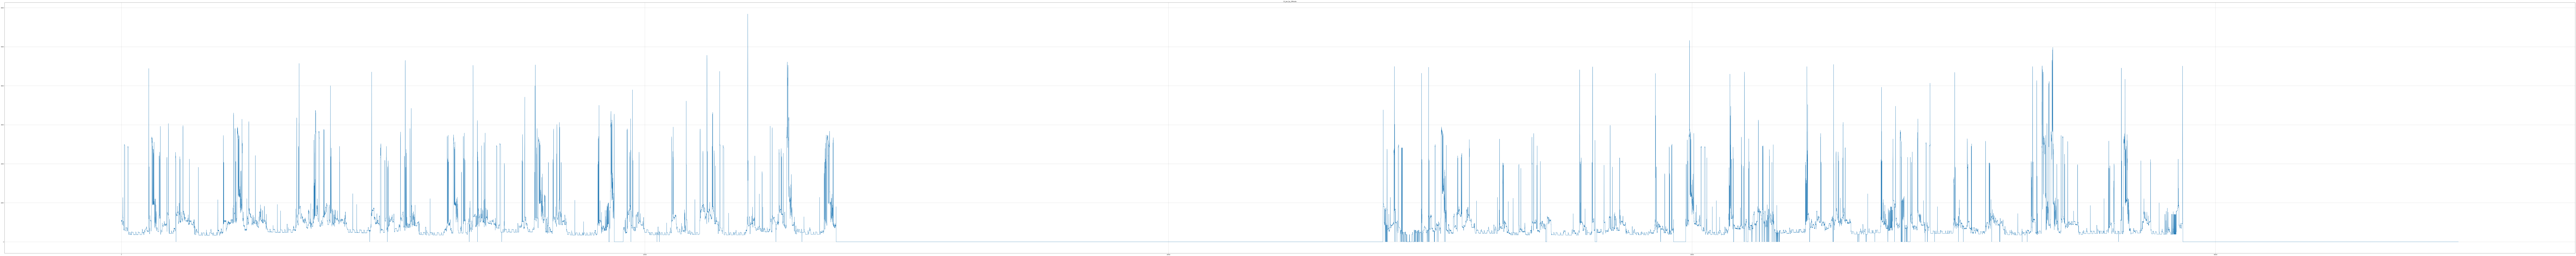

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(400,40))
plt.grid()
plt.title("13_Jan_by_1Minute")
plt.plot(range(len(ONE_MONTH_LIST)), ONE_MONTH_LIST)
plt.savefig('./13_Jan_by_1Minute.png')
plt.show()

### 보관안

In [ ]:
import csv
import time
import sys
month = {1:31, 2:28, 3:31, 4:30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30, 12:31}


print("해당 전력 데이터는 2012년 11월 10일부터 2017년 4월 25일까지 온전한 데이터가 존재합니다.\n")
time.sleep(0.5)
print("데이터는 사용자가 선택한 기간 중 1년 단위로 처리됩니다.\n")
time.sleep(0.5)
global TARGET_YEAR_START 
TARGET_YEAR_START = int(input("목표로 하는 처리 기간의 시작 연도를 4자리 숫자로 입력해주세요. : \n"))
time.sleep(0.5)
global TARGET_YEAR_END
TARGET_YEAR_END = int(input("목표로 하는 처리 기간의 종료 연도를 4자리 숫자로 입력해주세요. : \n"))
time.sleep(0.5)

if(TARGET_YEAR_START<2012 or TARGET_YEAR_START>2017 or TARGET_YEAR_END>2017 or  TARGET_YEAR_END<2012):
    print("\---기간을 잘못 설정했습니다!---")
    print("---프로그램을 종료합니다.---")
    sys.exit()

if(TARGET_YEAR_START==2012 or TARGET_YEAR_END==2017):
    print("\n---해당 기간은 현재 서비스하지 않습니다!---")
    print("---프로그램을 종료합니다.---")
    sys.exit()

global HANDLE_MINUTE
HANDLE_MINUTE = int(input("데이터들은 기본적으로 1분 단위 최댓값으로 정리됩니다.\n추후 가공될 분 단위를 5분과 10분 중 골라 숫자만 입력해주세요. : \n"))
if(HANDLE_MINUTE!=5 and HANDLE_MINUTE!=10):
    print("\n---잘못된 시간 처리 단위를 선택했습니다!---")
    print("---프로그램을 종료합니다.---")
    sys.exit()

EMPTY_HOUR_LIST=[]
for _ in range(60):
    EMPTY_HOUR_LIST.append(0)
    
EMPTY_DAY_LIST=[]
for _ in range(1440):
    EMPTY_DAY_LIST.append(0)
        
TARGET_YEAR_START = 2013
TARGET_YEAR_END=2013

def value (data, num):
    list0 = data.loc[num].values.tolist()
    date = list0[1]
    YYYY = date.year
    MM = date.month
    DD = date.day
    hh = date.hour
    mm = date.minute
    watt = list0[2]
    return YYYY, MM, DD, hh, mm, watt, date

print(value(ch1_dated,431369)[0])

#i1=0
i1=431369
while(i1 < len(ch1_dated)):
    print("전체 과정 시작")
    YEAR0 = value(ch1_dated, i1)[0]

    if(YEAR0>=TARGET_YEAR_START and YEAR0<=TARGET_YEAR_END):
        print("<<<<<{0}년 데이터 시작 {1}>>>>>".format(YEAR0, value(ch1_dated, i1)[6]))
        MONTH0 = value(ch1_dated, i1)[1]
        
        REAL_DAY = 1
        ONE_MONTH_LIST=[]
        while(MONTH0<13):
            print("<<<<{0}월 데이터 시작 {1}>>>>".format(MONTH0, value(ch1_dated, i1)[6]), i1)
            MONTH1 = value(ch1_dated, i1)[1]
            DAY1= value(ch1_dated, i1)[2]
            
            if DAY1==REAL_DAY:
                while(REAL_DAY<=month[MONTH1]):
                    print("<<<{0}일 데이터 시작 {1}>>>".format(REAL_DAY, value(ch1_dated, i1)[6]), i1)
        
                    REAL_HOUR = 0
                    ONE_DAY_LIST=[]
                    while(REAL_HOUR<24):
                        print("<<{0}시 데이터 시작 {1}>>".format(REAL_HOUR, value(ch1_dated, i1)[6]), i1)
                        HOUR1 = value(ch1_dated, i1)[3]

                        REAL_MINUTE = 0
                        MIN_60_LIST=[]
                        if HOUR1==REAL_HOUR:
                            while(REAL_MINUTE<60):#특정 시간대 안에서 분단위 데이터를 60개 처리
                                MINUTE1 = value(ch1_dated, i1)[4]
                                HOUR2 = value(ch1_dated, i1)[3]

                                print("<{0}분 데이터 시작 {1}>".format(REAL_MINUTE, value(ch1_dated, i1)[6]),i1)
                                SEC_60_LIST=[]

                                if MINUTE1==REAL_MINUTE and HOUR2==REAL_HOUR:
                                    while(True):#특정 분대 안에서 초단위 데이터를 처리
                                        MONTH2 = value(ch1_dated, i1)[1]
                                        DAY1 = value(ch1_dated, i1)[2] #여기 넣는게 맞나......??
                                        HOUR3 = value(ch1_dated, i1)[3]
                                        MINUTE2 = value(ch1_dated, i1)[4]
                                        SEC_60_LIST.append(value(ch1_dated, i1)[5])
                                        i1+=1

                                        if MINUTE1!=MINUTE2:
                                            if MINUTE2-MINUTE1==1 or MINUTE1-MINUTE2==59: #직후 분으로 넘어가거나 59분에서 다음 시로 넘어가는 경우
                                                print("*{0}분의 값들 >> {1}\n".format(MINUTE1, SEC_60_LIST))
                                                i1-=1
                                                break

                                            else:#진행되다가 분대가 넘어가긴 했으나 다음 분으로 넘어가지 않고 점프해버린경우
                                                print("*{0}분의 값들 >> {1} (결손 후 점프 시각 => {2})\n".format(MINUTE1, SEC_60_LIST, value(ch1_dated, i1)[6]))
                                                break

                                if MINUTE1!=REAL_MINUTE:#아예 해당분대가 결손된 경우
                                    if HOUR3==REAL_HOUR:
                                        print("같은 시각대 내 분 결손")
                                        SEC_60_LIST.append(0)
                                        print("*{0}시 {1}분의 결손치는 0으로 처리됨.\n".format(REAL_HOUR, REAL_MINUTE))
                                        
                                    if HOUR3!=REAL_HOUR:
                                        print("결손 + 타 시각대 점프")
                                        for _ in range(60-len(MIN_60_LIST)):
                                            MIN_60_LIST.append(0)
                                            print("*{0}시 {1}분의 결손치는 0으로 처리됨.\n".format(REAL_HOUR, REAL_MINUTE))
                                            REAL_MINUTE+=1
                                        break
                                
                                MIN_60_LIST.append(max(SEC_60_LIST))
                                REAL_MINUTE+=1

                        # 어떤 경우든 간에 시간이 바뀌는 경우, 정상이든 결손이든
                        if HOUR1!=REAL_HOUR:                
                            if DAY1==REAL_DAY:
                                print("시각 불일치! 점프됨!")
                                for i in EMPTY_HOUR_LIST:
                                    ONE_DAY_LIST.append(i)
                                print("*{0}시의 결손 데이터는 60개의 0으로 처리됨.{1}".format(REAL_HOUR, "\n"*3))
                                
                            if DAY1!=REAL_DAY:
                                print("시각 불일치! 점프됨!")
                                if REAL_HOUR==0:
                                    break

                                FAKE_HOUR=REAL_HOUR
                                for _ in range(23-REAL_HOUR+1):
                                    for i in EMPTY_HOUR_LIST:
                                        ONE_DAY_LIST.append(i)
                                    print("*{0}시의 결손 데이터는 60개의 0으로 처리됨.{1}".format(FAKE_HOUR, "\n"*3))
                                    FAKE_HOUR+=1
                                REAL_HOUR=23
                                

                        if REAL_MINUTE==60:
                            if len(MIN_60_LIST)==60:
                                for i in MIN_60_LIST:
                                    ONE_DAY_LIST.append(i)
                                
                            if len(MIN_60_LIST)<60:
                                for i in range(60-len(MIN_60_LIST)):
                                    MIN_60_LIST.append(0)
                                for i in MIN_60_LIST:
                                    ONE_DAY_LIST.append(i)
                                    
                            print("*{0}시의 분별 최댓값 {1}개 >> {2}{3}".format(REAL_HOUR, len(MIN_60_LIST), MIN_60_LIST, "\n"*3))
                            
                        REAL_HOUR+=1

                    if REAL_HOUR==24:
                        if len(ONE_DAY_LIST)==1440:
                            for i in ONE_DAY_LIST:
                                    ONE_MONTH_LIST.append(i)
                        if len(ONE_DAY_LIST)<1440:
                            for _ in range(1440-len(ONE_DAY_LIST)):
                                ONE_DAY_LIST.append(0)
                            for i in ONE_DAY_LIST:
                                ONE_MONTH_LIST.append(i)
                                
                        print(len(ONE_MONTH_LIST), len(ONE_MONTH_LIST)//1440)
                        print("*{0}일의 분별 최댓값 {1}개 추가됨.{2}".format(REAL_DAY, len(ONE_DAY_LIST), "\n"*5))
                            
                    if DAY1!=REAL_DAY and REAL_HOUR!=24:
                        break
                    
                    REAL_DAY+=1
                    #print("Real Day 1 더해짐! 현재 정상일 => {0}{1}".format(REAL_DAY, "\n"*5))
                    
            if DAY1!=REAL_DAY:
                if MONTH2==MONTH1:
                    #for _ in range(DAY1-REAL_DAY-1):
                    for _ in range(1440-len(ONE_DAY_LIST)):
                        ONE_DAY_LIST.append(0)
                    for i in ONE_DAY_LIST:
                        ONE_MONTH_LIST.append(i)
                            
                    print(len(ONE_MONTH_LIST), len(ONE_MONTH_LIST)//1440)
                    print("*{0}일의 분별 최댓값 {1}개 결손 처리됨(1).{2}".format(REAL_DAY, len(ONE_DAY_LIST), "\n"*5))
                    REAL_DAY+=1
                    
                if MONTH2!=MONTH1:
                    while(REAL_DAY<=month[MONTH1]):
                        print("일자 불일치! 점프됨!")
                        print(REAL_DAY, month[MONTH1])
                        if REAL_HOUR==0:
                            ONE_DAY_LIST=EMPTY_DAY_LIST
                            for i in EMPTY_DAY_LIST:
                                ONE_MONTH_LIST.append(i)

                        if REAL_HOUR!=0:
                            for _ in range(1440-len(ONE_DAY_LIST)):
                                ONE_DAY_LIST.append(0)
                            for i in ONE_DAY_LIST:
                                ONE_MONTH_LIST.append(i)
                                
                        print(len(ONE_MONTH_LIST), len(ONE_MONTH_LIST)//1440)
                        print("*{0}일의 분별 최댓값 {1}개 결손 처리됨(2).{2}".format(REAL_DAY, len(ONE_DAY_LIST), "\n"*5))
                        REAL_DAY+=1
                        
                    if REAL_DAY==month[MONTH1]+1:
                        break
                
                
        print("{0}월의 전체 데이터 {1}개 CSV 파일 저장 완료 {2}{3}".format(MONTH1, len(ONE_MONTH_LIST), len(ONE_MONTH_LIST)//1440, "\n"*10))
                
    else:
        i1+=1
        pass

### 아래가 원본

In [ ]:
import csv
import time

month = {1:31, 2:28, 3:31, 4:30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30, 12:31}

# 1. 
i = 431369#431369가 맞음
print('Running!', '\n'*4)


# 2. 
while(i < 20284837):
    try:
        list1 = ch1_date.loc[i].values.tolist()
        date = list1[1]
        y1 = date.year
        M1 = date.month
        d1 = date.day
        H1 = date.hour 
        n = 0 

        # 3. 
        while(H1 < 24):
            H0 = 0 

            # 3'. 
            while(H0 < 24):
                watt_list=[]
                h = date.hour

                # 3.1. 
                if(H1 == H0):

                    # 3.1'. 
                    while(h < h+1):
                        n=n+1
                        list2 = ch1_date.loc[i].values.tolist()
                        date = list2[1]
                        watt = list2[2]
                        y = date.year
                        M = date.month
                        d = date.day
                        h = date.hour
                        m = date.minute
                        s = date.second

                        j=h-H1

                        # 3.1'.1. 
                        if(j==0):
                            watt_list.append(watt)
                            i = i+1

                        # 3.1'.2.
                        elif (j==1):
                            max_watt = max(watt_list)

                            hourly_date2 = '{0}년 {1}월 {2}일 - {3}시'.format(y, M, d, H1)
                            hourly_date5 = '{0} {1} {2}'.format(y, M, d) 
                            hourly_list = []
                            hourly_list.append(hourly_date2)
                            hourly_list.append(max_watt)

                            with open("./Electirc_Data_CSV/"+str(y)+'_'+str(M)+'_'+"House1_Ch1_Electric_Data.csv", 'a', newline='') as file:
                                writer = csv.writer(file)
                                writer.writerow(hourly_list)       

                            H1 = H1+1 
                            H0 = H0+1
                            break

                        # 3.1'.3. 
                        elif(d1+1==d and h ==0 and H1 ==23):
                            d=d-1
                            h=h+24

                            max_watt = max(watt_list)

                            hourly_date3 = '{0}년 {1}월 {2}일 - {3}시'.format(y, M, d, H1)
                            hourly_list = []
                            hourly_list.append(hourly_date3)
                            hourly_list.append(max_watt)

                            with open("./Electirc_Data_CSV/"+str(y)+'_'+str(M)+'_'+"House1_Ch1_Electric_Data.csv", 'a', newline='') as file:
                                writer = csv.writer(file)
                                writer.writerow(hourly_list)       

                            H1 = H1+1 
                            H0 = H0+1                   
                            break

                        # 3.1'.4.
                        elif (n>600):
                            list(hourly_date5)
                            listed = hourly_date5.split()
                            y4 = listed[0]
                            M4 = listed[1]
                            d4 = listed[2]

                            max_watt = max(watt_list)

                            hourly_date = '{0}년 {1}월 {2}일 - {3}시'.format(y4, M4, d4, H1)
                            hourly_list = []
                            hourly_list.append(hourly_date)
                            hourly_list.append(max_watt)

                            with open("./Electirc_Data_CSV/"+str(y4)+'_'+str(M4)+'_'+"House1_Ch1_Electric_Data.csv", 'a', newline='') as file:
                                writer = csv.writer(file)
                                writer.writerow(hourly_list)       

                            # 3.1'.4.1. 
                            if(d1==d):
                                jc=j

                                while(jc>1):
                                    h=h+1
                                    hourly_date = '{0}년 {1}월 {2}일 - {3}시'.format(y4, M4, d4, h-j)
                                    hourly_list = []
                                    hourly_list.append(hourly_date)
                                    hourly_list.append('Null')

                                    with open("./Electirc_Data_CSV/"+str(y4)+'_'+str(M4)+'_'+"House1_Ch1_Electric_Data.csv", 'a', newline='') as file:
                                        writer = csv.writer(file)
                                        writer.writerow(hourly_list)  

                                    jc=jc-1
                                    H1 = H1+1
                                    H0 = H0+1

                                H1 = H1+1
                                H0 = H0+1

                            # 3.1'.4.2.
                            if(d1!=d):

                                while(H1<23):
                                    hourly_date = '{0}년 {1}월 {2}일 - {3}시'.format(y4, M4, d4, H1+1)
                                    hourly_list = []
                                    hourly_list.append(hourly_date)
                                    hourly_list.append('Null')

                                    with open("./Electirc_Data_CSV/"+str(y4)+'_'+str(M4)+'_'+"House1_Ch1_Electric_Data.csv", 'a', newline='') as file:
                                        writer = csv.writer(file)
                                        writer.writerow(hourly_list)  

                                    H1 = H1+1
                                    H0 = H0+1

                                H1 = H1+1
                                H0 = H0+1

                                # 3.1'.4.2.1. 
                                if(int(d4)+1 != d):
                                    D = int(d4)+1 

                                    # 3.1'.4.2.1.1. 
                                    if(int(M) == int(M4)):
                                        while(D<d):
                                            for x in range (0,24):
                                                hourly_date = '{0}년 {1}월 {2}일 - {3}시'.format(y4, M4, D, x)
                                                hourly_list = []
                                                hourly_list.append(hourly_date)
                                                hourly_list.append('Null')

                                                with open("./Electirc_Data_CSV/"+str(y4)+'_'+str(M4)+'_'+"House1_Ch1_Electric_Data.csv", 'a', newline='') as file:
                                                    writer = csv.writer(file)
                                                    writer.writerow(hourly_list)  

                                            D=D+1

                                    # 3.1'.4.2.1.2.
                                    if(int(M) != int(M4)):
                                        while(D<=month[int(M4)]):
                                            for x in range (0,24):
                                                hourly_date = '{0}년 {1}월 {2}일 - {3}시'.format(y4, M4, D, x)
                                                hourly_list = []
                                                hourly_list.append(hourly_date)
                                                hourly_list.append('Null')

                                                with open("./Electirc_Data_CSV/"+str(y4)+'_'+str(M4)+'_'+"House1_Ch1_Electric_Data.csv", 'a', newline='') as file:
                                                    writer = csv.writer(file)
                                                    writer.writerow(hourly_list)  

                                            D=D+1

                                        D2 = 1
                                        while(D2 < d):
                                            for x in range (0,24):
                                                hourly_date = '{0}년 {1}월 {2}일 - {3}시'.format(y4, M, D2, x)
                                                hourly_list = []
                                                hourly_list.append(hourly_date)
                                                hourly_list.append('Null')

                                                with open("./Electirc_Data_CSV/"+str(y4)+'_'+str(M)+'_'+"House1_Ch1_Electric_Data.csv", 'a', newline='') as file:
                                                    writer = csv.writer(file)
                                                    writer.writerow(hourly_list)  

                                            D2 = D2+1

                            break


                # 3.2. 
                if(H1 != H0):
                    list3 = ch1_date.loc[i].values.tolist()
                    date = list3[1]
                    watt = list3[2]
                    y = date.year
                    M = date.month
                    d = date.day
                    h = date.hour
                    m = date.minute
                    s = date.second

                    j=h-H1           

                    hourly_date3121 = '{0}년 {1}월 {2}일 - {3}시'.format(y, M, d, H0)
                    hourly_list3121 = []
                    hourly_list3121.append(hourly_date3121)
                    hourly_list3121.append('Null')

                    with open("./Electirc_Data_CSV/"+str(y)+'_'+str(M)+'_'+"House1_Ch1_Electric_Data.csv", 'a', newline='') as file:
                        writer = csv.writer(file)
                        writer.writerow(hourly_list3121)       

                    h = h+1
                    H0 = H0+1

                    if (H0 ==23 and h!=24 and H1!=23):
                                break

                    if(h==24 and H0==23 and H1==23):
                        hourly_date3121 = '{0}년 {1}월 {2}일 - 23시'.format(y, M, d)
                        hourly_list3121 = []
                        hourly_list3121.append(hourly_date3121)
                        hourly_list3121.append('Null')

                        with open("./Ch"+str(Total_num)+"_Electirc_Data_CSV/"+str(y)+'_'+str(M)+'_'+"House1_Ch"+str(Total_num)+"_Electric_Data.csv", 'a', newline='') as file:
                            writer = csv.writer(file)
                            writer.writerow(hourly_list3121)

            break
    except:
        pass
    
print('Job Done!!')
time.sleep(5)